In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import optuna
import warnings
from sklearn.svm import SVC, SVR
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet,RidgeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,\
RandomForestRegressor,VotingRegressor,HistGradientBoostingRegressor

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,\
RandomForestClassifier,VotingClassifier,HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,make_scorer,auc,
                            roc_auc_score, average_precision_score, log_loss,r2_score,mean_absolute_error,
                            brier_score_loss, cohen_kappa_score, confusion_matrix,root_mean_squared_error,
                            roc_curve, precision_recall_curve, classification_report,mean_squared_error)

warnings.filterwarnings('ignore')

In [2]:
#!jupyter nbextension enable --py widgetsnbextension

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Exploratory Data Analysis...
Dataset shape: (768, 8)

Feature statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  


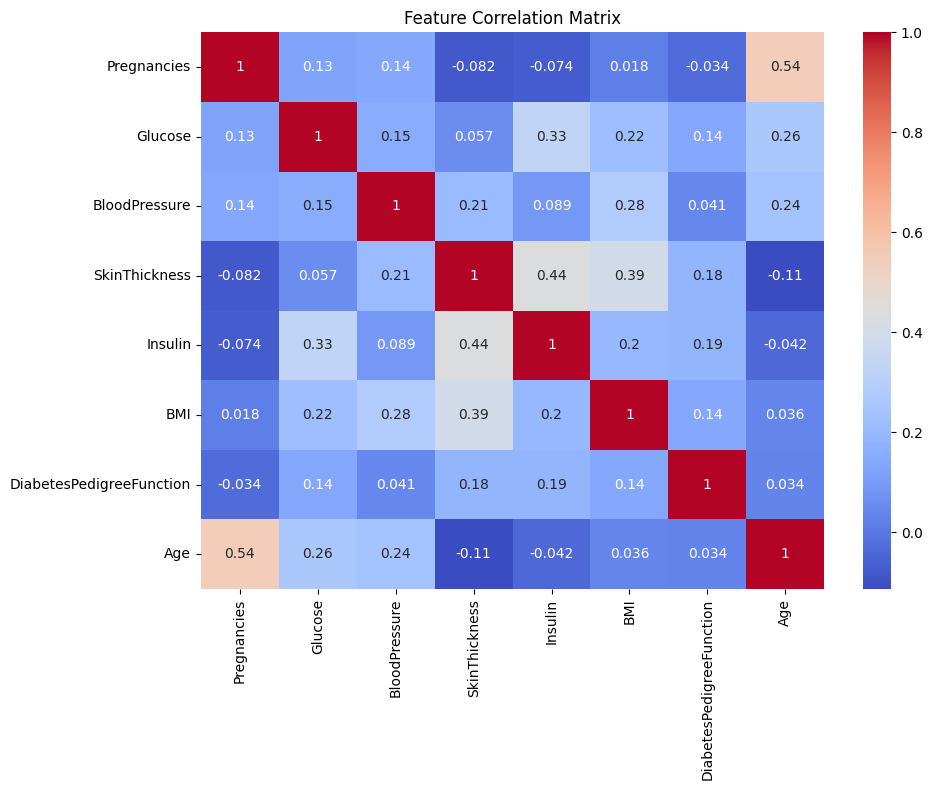

In [6]:
# 2. Exploratory Data Analysis
def explore_data(X, y):
    """Perform basic exploratory data analysis"""
    print("\nStep 2: Exploratory Data Analysis...")
    
    # Basic data info
    print(f"Dataset shape: {X.shape}")
    print("\nFeature statistics:")
    print(X.describe())
    
    # Check for missing values
    print("\nMissing values:")
    print(X.isnull().sum())
    
    # Target distribution
    print("\nTarget distribution:")
    print(y.value_counts())
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

explore_data(X,y)

In [7]:
# Assuming you have a random_state defined
random_state = 42 # Or any integer

# Instantiate the scaler (you can reuse this object definition)
scaler = StandardScaler()

# --- Create a pipeline for each model ---

# 1. Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()), # Or just use 'scaler' if you instantiated it already and prefer that
    ('logreg', LogisticRegression(random_state=random_state, max_iter=100000))
])

# 2. Decision Tree Pipeline
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=random_state))
])

# 3. Random Forest Pipeline
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=random_state))
])

# 4. Gradient Boosting Pipeline
gradient_boosting_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=random_state))
])

# 5. XGBoost Pipeline
# Note: XGBoost and LightGBM can often handle unscaled data well,
# but scaling still doesn't hurt and can sometimes help.
# 'use_label_encoder' is deprecated, set to False. 'eval_metric' is also often handled automatically now.
xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBClassifier(random_state=random_state))
])

# 6. LightGBM Pipeline
# 'force_col_wise' is an internal parameter, usually not needed unless you have specific data structure issues.
lightgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lightgbm', LGBMClassifier(random_state=random_state,force_col_wise=True, silent=True)) # Removed force_col_wise as it's often not needed
])

# 7. SVM Pipeline
# SVMs are *very* sensitive to scaling, so the scaler is essential here.
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=random_state, probability=True)) # probability=True is needed for predict_proba
])

# 8. K-Nearest Neighbors Pipeline
# KNN is also sensitive to scaling.
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [8]:
# Assume your pipelines (logreg_pipeline, decision_tree_pipeline, etc.) are defined

# Example Parameter Grids (Correct Syntax for Pipelines)

# Decision Tree Parameters
dt_param_grid = {
    # Correct: 'decision_tree__criterion' instead of 'criterion'
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [None, 10, 20, 30],
    'decision_tree__min_samples_split': [2, 5, 10]
    # ... other DT parameters
}

# Random Forest Parameters
rf_param_grid = {
    # Correct: 'random_forest__bootstrap' instead of 'bootstrap'
    'random_forest__bootstrap': [True, False],
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [10, 20, None]
    # ... other RF parameters
}

# Gradient Boosting Parameters
gb_param_grid = {
    # Correct: 'gradient_boosting__learning_rate' instead of 'learning_rate'
    'gradient_boosting__learning_rate': [0.01, 0.1, 0.2],
    'gradient_boosting__n_estimators': [100, 200, 300],
    'gradient_boosting__max_depth': [3, 4, 5]
    # ... other GB parameters
}

# XGBoost Parameters
xgb_param_grid = {
    # Correct: 'xgboost__colsample_bytree' instead of 'colsample_bytree'
    'xgboost__colsample_bytree': [0.7, 0.8, 0.9],
    'xgboost__learning_rate': [0.01, 0.1, 0.2],
    'xgboost__n_estimators': [100, 200, 300],
    'xgboost__max_depth': [3, 5, 7]
    # ... other XGB parameters
}

# LightGBM Parameters
lgbm_param_grid = {
    # Correct: 'lightgbm__learning_rate' instead of 'learning_rate'
    'lightgbm__learning_rate': [0.01, 0.1, 0.2],
    'lightgbm__n_estimators': [100, 200, 300],
    'lightgbm__num_leaves': [31, 63, 127] # LGBM specific parameter
    # ... other LGBM parameters
}

# SVM Parameters
svm_param_grid = {
    # Correct: 'svm__C' instead of 'C'
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    # Correct: 'svm__kernel' if tuning kernel, etc.
    'svm__kernel': ['rbf', 'linear']
    # ... other SVM parameters
}

# K-Nearest Neighbors Parameters
knn_param_grid = {
    # Correct: 'knn__n_neighbors' instead of 'n_neighbors'
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
    # ... other KNN parameters
}

In [9]:
# Example of running GridSearchCV with the corrected param_grid
grid_search_dt = GridSearchCV(estimator=decision_tree_pipeline,
                               param_grid=dt_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1) # Or your chosen scoring
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best parameters for Decision Tree: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': None, 'decision_tree__min_samples_split': 10}


In [10]:
# Example of running GridSearchCV with the corrected param_grid
grid_search_dt = GridSearchCV(estimator=random_forest_pipeline,
                               param_grid=rf_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1) # Or your chosen scoring
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search_dt.best_params_}")

Best parameters for Random Forest: {'random_forest__bootstrap': True, 'random_forest__max_depth': 20, 'random_forest__n_estimators': 200}


In [11]:
# Example of running GridSearchCV with the corrected param_grid
grid_search_dt = GridSearchCV(estimator=gradient_boosting_pipeline,
                               param_grid=gb_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1) # Or your chosen scoring
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grid_search_dt.best_params_}")

Best parameters for Gradient Boosting: {'gradient_boosting__learning_rate': 0.01, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 300}


In [12]:
# Example of running GridSearchCV with the corrected param_grid
grid_search_dt = GridSearchCV(estimator=svm_pipeline,
                               param_grid=svm_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1) # Or your chosen scoring
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for SVM: {grid_search_dt.best_params_}")

Best parameters for SVM: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [13]:
# Example of running GridSearchCV with the corrected param_grid
grid_search_dt = GridSearchCV(estimator=knn_pipeline,
                               param_grid=knn_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1) # Or your chosen scoring
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search_dt.best_params_}")

Best parameters for KNN: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}


In [14]:
# Use a 'with' statement to filter warnings only during the training call
with warnings.catch_warnings():
    # You might need to experiment with the exact warning category.
    # Often, these LightGBM warnings are UserWarning.
    warnings.filterwarnings("ignore", message="[LightGBM] [Warning] No further splits with positive gain, best gain: -inf", category=UserWarning)
    # Or more generally ignore all UserWarnings from lightgbm (less precise)
    # warnings.filterwarnings("ignore", category=UserWarning)

    # Now fit the model/pipeline - the warning should be suppressed
    # lightgbm_pipeline.fit(X_train, y_train)

# Warnings are no longer filtered outside the 'with' block

In [15]:
# Example training and predicting with the Logistic Regression pipeline
logreg_pipeline.fit(X_train, y_train)
logreg_predictions = logreg_pipeline.predict(X_test)

# Example training and predicting with the Random Forest pipeline
random_forest_pipeline.fit(X_train, y_train)
rf_predictions = random_forest_pipeline.predict(X_test)

decision_tree_pipeline.fit(X_train, y_train)
dec_tree_predictions = decision_tree_pipeline.predict(X_test)

gradient_boosting_pipeline.fit(X_train, y_train)
grad_boost_predictions = gradient_boosting_pipeline.predict(X_test)

xgboost_pipeline.fit(X_train, y_train)
xgboost_predictions = xgboost_pipeline.predict(X_test)

lightgbm_pipeline.fit(X_train, y_train)
lightgbm_predictions = lightgbm_pipeline.predict(X_test)

svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test) 

knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [30]:
# Now, create a dictionary where keys are the names you want,
# and values are the corresponding pipeline objects
#models = {
#    'logistic_regression': logreg_pipeline,
#    'decision_tree': decision_tree_pipeline,
#    'random_forest': random_forest_pipeline,
#    'gradient_boosting': gradient_boosting_pipeline,
#    'xgboost': xgboost_pipeline,
#    'lightgbm': lightgbm_pipeline,
#    'svm': svm_pipeline,
#    'knn': knn_pipeline,
#}

## 2 Second Pipeline

In [17]:
# Define random_state for reproducibility
random_state = 42

# Step 1: Load your data
# Replace this with your actual data loading code
# Example:
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# For demonstration purposes, let's create some synthetic data
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                           #n_redundant=5, random_state=random_state)

# Step 2: Split the data
X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [18]:
# Step 3: Define visualization functions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

In [19]:
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return roc_auc

In [20]:
# Step 4: Re-define the pipelines and parameter grids (from your input)
# Pipelines
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=random_state, max_iter=100000))
])

decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=random_state))
])

random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=random_state))
])

gradient_boosting_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=random_state))
])

xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgboost', XGBClassifier(random_state=random_state))
])

lightgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lightgbm', LGBMClassifier(random_state=random_state, silent=True))
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=random_state, probability=True))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter grids
dt_param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [None, 10, 20, 30],
    'decision_tree__min_samples_split': [2, 5, 10]
}

rf_param_grid = {
    'random_forest__bootstrap': [True, False],
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [10, 20, None]
}

In [25]:
# Step 5: Create a function to train and evaluate models
def train_and_evaluate(model, param_grid, X_train, X_test, y_train, y_test, model_name, perform_grid_search=True):
    """
    Train and evaluate a model with optional grid search.
    
    Parameters:
    -----------
    model : Pipeline
        The model pipeline
    param_grid : dict
        Parameters for grid search
    X_train, X_test, y_train, y_test : arrays
        Train and test data
    model_name : str
        Name of the model for reporting
    perform_grid_search : bool
        Whether to perform grid search or just train the model as-is
        
    Returns:
    --------
    dict
        Results including the model, predictions, and metrics
    """
    results = {}
    
    if perform_grid_search:
        print(f"\n{'-'*50}")
        print(f"Training {model_name} with Grid Search...")
        
        # Smaller CV for demonstration purposes - increase for better results
        grid_search = GridSearchCV(
            model, param_grid, cv=3, scoring='accuracy', 
            n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)
        
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
        
        best_model = grid_search.best_estimator_
        results['best_params'] = grid_search.best_params_
        results['cv_score'] = grid_search.best_score_
    else:
        print(f"\n{'-'*50}")
        print(f"Training {model_name} without Grid Search...")
        
        best_model = model
        best_model.fit(X_train, y_train)
        
        # Calculate cross-validation score
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        results['cv_score'] = cv_scores.mean()
        print(f"Cross-validation score: {results['cv_score']:.4f}")
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # For ROC curve and AUC
    try:
        y_prob = best_model.predict_proba(X_test)[:, 1]
        has_predict_proba = True
    except:
        y_prob = None
        has_predict_proba = False
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Store results
    results['model'] = best_model
    results['y_pred'] = y_pred
    results['y_prob'] = y_prob
    results['accuracy'] = accuracy
    results['report'] = report
    results['has_predict_proba'] = has_predict_proba
    
    # Visualization
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    if has_predict_proba:
        roc_auc_value = plot_roc_curve(y_test, y_prob, model_name)
        results['roc_auc'] = roc_auc_value
    
    return results

Starting model training and evaluation...

--------------------------------------------------
Training Decision Tree with Grid Search...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': None, 'decision_tree__min_samples_split': 10}
Best cross-validation score: 0.7329

Decision Tree Results:
Accuracy: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



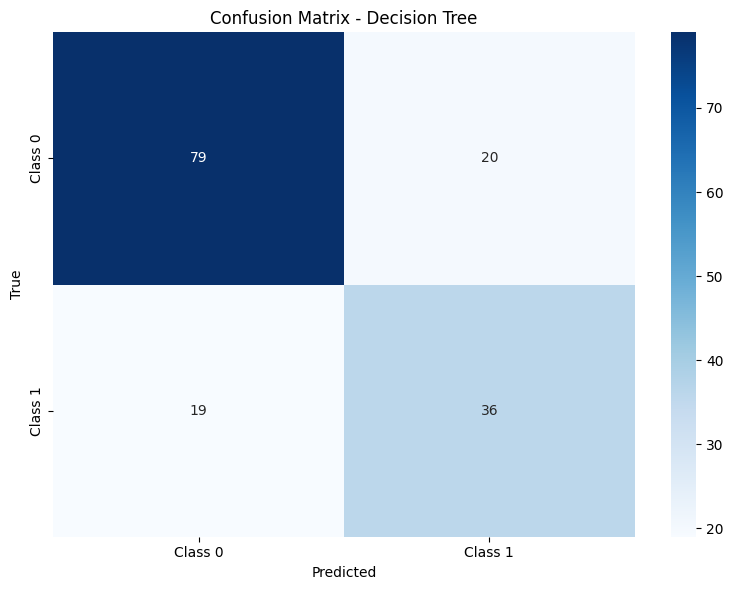

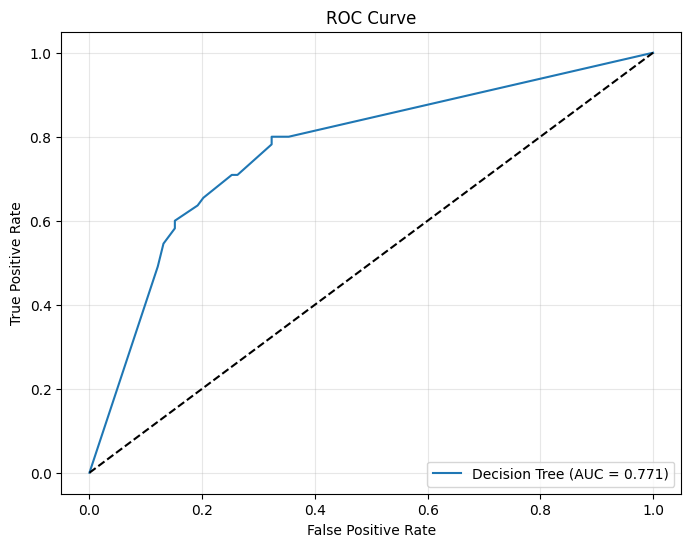


--------------------------------------------------
Training Random Forest with Grid Search...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'random_forest__bootstrap': False, 'random_forest__max_depth': 10, 'random_forest__n_estimators': 200}
Best cross-validation score: 0.7833

Random Forest Results:
Accuracy: 0.7403

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



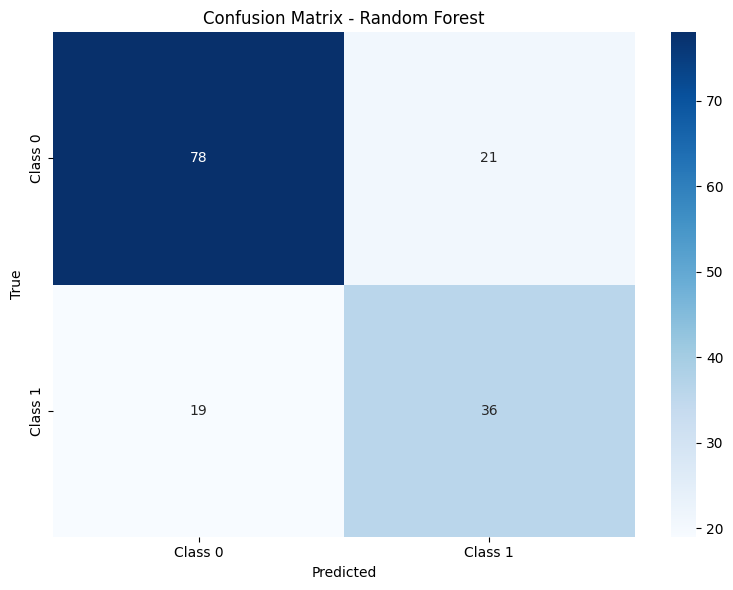

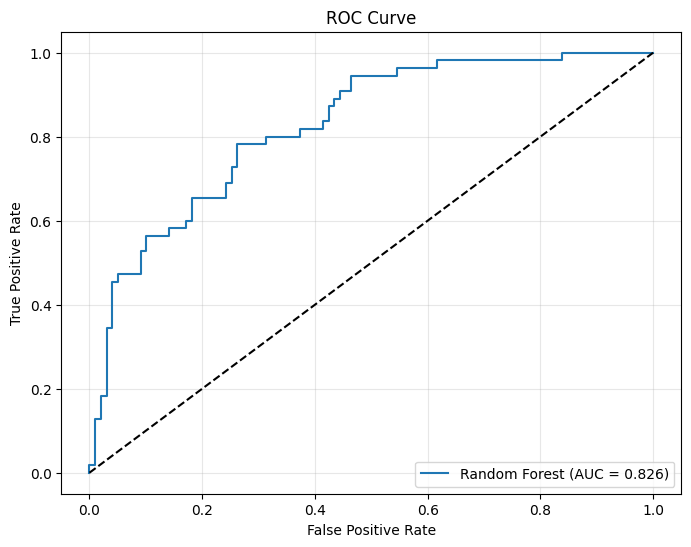


--------------------------------------------------
Training Logistic Regression without Grid Search...
Cross-validation score: 0.7606

Logistic Regression Results:
Accuracy: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



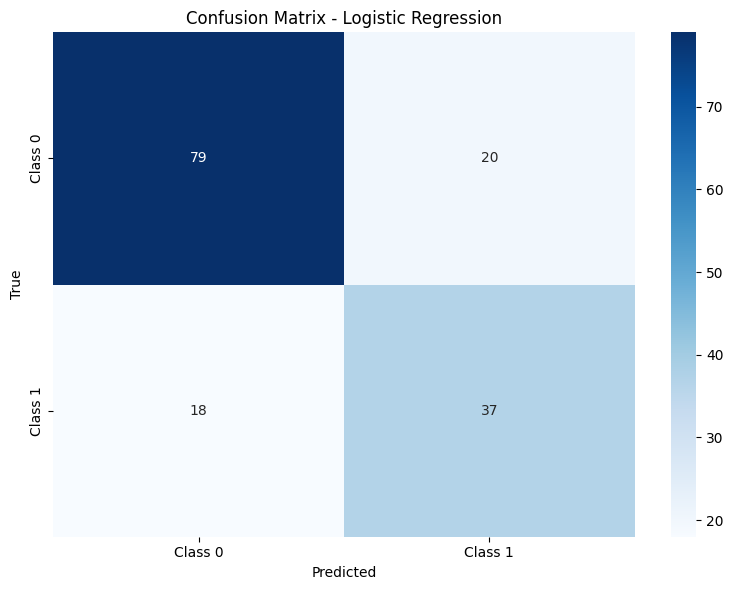

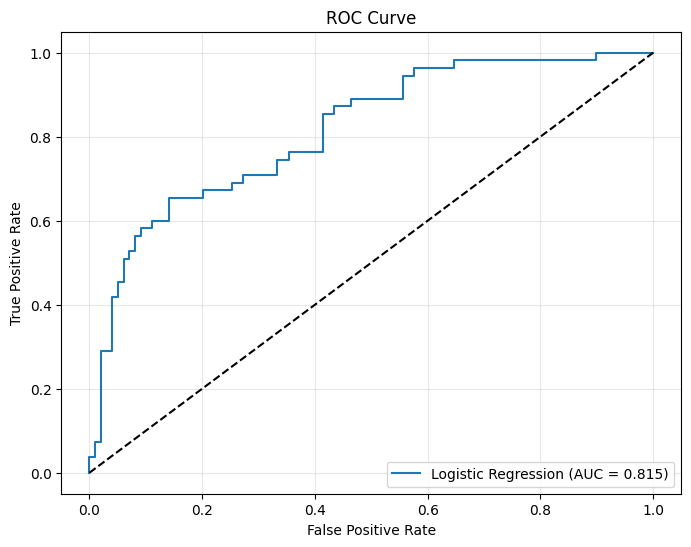

In [26]:
# Step 7: Run the models - Example with 3 models
# Note: For quick demonstration, we're only running a few models
# You can uncomment additional models as needed

print("Starting model training and evaluation...")

# Example with Decision Tree
dt_results = train_and_evaluate(
    decision_tree_pipeline, dt_param_grid,
    X_train, X_test, y_train, y_test,
    'Decision Tree', perform_grid_search=True
)

# Example with Random Forest
rf_results = train_and_evaluate(
    random_forest_pipeline, rf_param_grid,
    X_train, X_test, y_train, y_test,
    'Random Forest', perform_grid_search=True
)

# Example with a model without grid search
logreg_results = train_and_evaluate(
    logreg_pipeline, {}, # Empty param grid since we're not doing grid search
    X_train, X_test, y_train, y_test,
    'Logistic Regression', perform_grid_search=False
)

In [27]:
# Step 8: Compare the models
models_to_compare = {
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'Logistic Regression': logreg_results
}

# Create a dataframe to compare results
comparison_data = []
for name, results in models_to_compare.items():
    model_data = {
        'Model': name,
        'Accuracy': results['accuracy'],
        'CV Score': results['cv_score']
    }
    if results['has_predict_proba']:
        model_data['ROC AUC'] = results.get('roc_auc', None)
    
    comparison_data.append(model_data)

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy  CV Score   ROC AUC
0        Decision Tree  0.746753  0.732887  0.770707
1        Random Forest  0.740260  0.783325  0.826263
2  Logistic Regression  0.753247  0.760629  0.814692


<Figure size 1000x600 with 0 Axes>

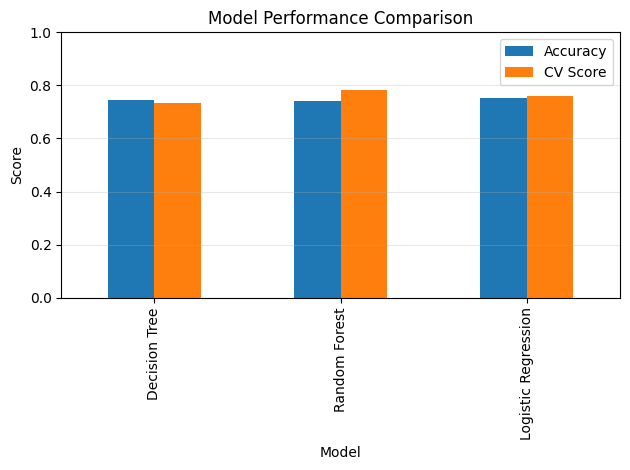

In [28]:
# Step 9: Plot comparison
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model')[['Accuracy', 'CV Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
# Step 10: Get predictions from the best model
# Find the best model based on test accuracy
best_model_name = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
print(f"\nThe best model based on test accuracy is: {best_model_name}")

# Use the best model for predictions
best_model = models_to_compare[best_model_name]['model']
new_data = X_test[:5]  # Just an example - replace with your actual new data
new_predictions = best_model.predict(new_data)
print(f"\nPredictions from the best model ({best_model_name}):")
print(new_predictions)

# If the model supports probability predictions
if models_to_compare[best_model_name]['has_predict_proba']:
    new_probabilities = best_model.predict_proba(new_data)
    print("\nPrediction probabilities:")
    print(new_probabilities)


The best model based on test accuracy is: Logistic Regression

Predictions from the best model (Logistic Regression):
[0 0 0 0 0]

Prediction probabilities:
[[0.72263617 0.27736383]
 [0.81404023 0.18595977]
 [0.88534248 0.11465752]
 [0.82860383 0.17139617]
 [0.53156207 0.46843793]]
